<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Forecast-of-COVID-19-cases" data-toc-modified-id="Forecast-of-COVID-19-cases-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Forecast of COVID-19 cases</a></span></li><li><span><a href="#Risk-assessment-of-COVID-19-cases" data-toc-modified-id="Risk-assessment-of-COVID-19-cases-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Risk assessment of COVID-19 cases</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Summary Statistics</a></span></li></ul></li><li><span><a href="#Method:-Regression-Tree" data-toc-modified-id="Method:-Regression-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Method: Regression Tree</a></span><ul class="toc-item"><li><span><a href="#Paper-Model" data-toc-modified-id="Paper-Model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Paper Model</a></span><ul class="toc-item"><li><span><a href="#Different-representation-of-regression-tree" data-toc-modified-id="Different-representation-of-regression-tree-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Different representation of regression tree</a></span></li><li><span><a href="#Variable-Importance-Plot" data-toc-modified-id="Variable-Importance-Plot-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Variable Importance Plot</a></span></li></ul></li><li><span><a href="#RT-Europa" data-toc-modified-id="RT-Europa-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>RT Europa</a></span></li></ul></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Metrics</a></span></li></ul></li></ul></div>

# Forecast of COVID-19 cases

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

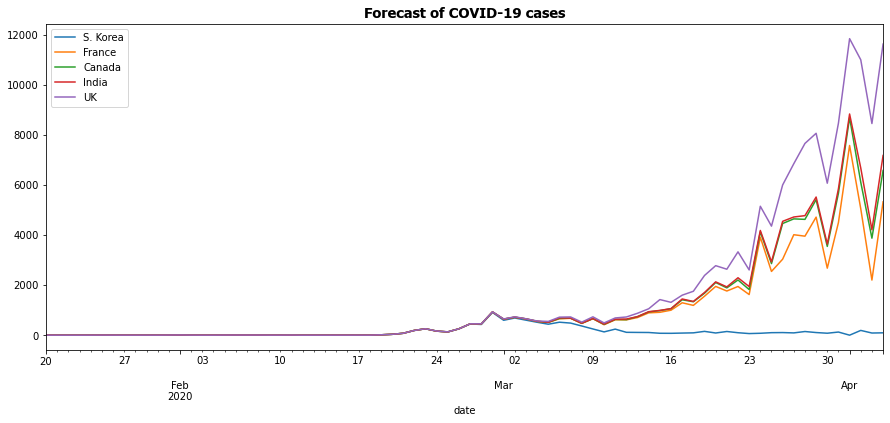

In [2]:
arima_data = pd.read_excel("../data/Real_time_forecast_dataset_04_04_20.xlsx")

#Fix range
length=arima_data.count()
for k,i in enumerate(length):
    arima_data[arima_data.columns[k]]=arima_data[arima_data.columns[k]].shift(periods=len(arima_data)-i)
arima_data['date'] = pd.date_range(end='4/4/2020', periods=len(arima_data), freq='D')

arima_data = arima_data.set_index(arima_data['date']).drop(columns='date')
arima_data.plot(
    kind='line', stacked=True,
    figsize = (15,6)
).set_title('Forecast of COVID-19 cases',
            fontfamily='Tahoma',
            fontsize='x-large',
            fontstyle='italic',
            fontweight ='extra bold',
            fontvariant='small-caps');

# Risk assessment of COVID-19 cases

At the outset of the COVID-19 outbreak, data on country-wise case fatality rates due to COVID-19 were obtained for 50 affected countries. The **case fatality rate (CFR)** can be crudely defined as the number of deaths in persons who tested positive for COVID-19 divided by the confirmed number of COVID-19 cases. 

In this section, we are going to find out a list of essential causal variables that have strong influences on the CFR. The datasets and codes of this section are made publicly available at https://github.com/indrajitg-r/COVID for the reproducibility of this work.

## Data

The CFR modeling dataset consists of 50 observations having ten possible causal variables and one numerical output variable.

The possible causal variables considered in this study are the followings: 
- the total number of COVID-19 cases (in thousands) in the country till 4 April, 2020, 
- population density per km2 for the country,
- total population (in millions) of the country (approx.),
- percentage of people in the age group of greater than 65 years,
- lockdown days count (from the starting day of lockdown till April 4, 2020), 
- time-period (in days) of COVID-19 cases for the country (starting date to April 4, 2020), 
- doctors per 1000 people in the country, 
- hospital beds per 1000 people in the country, 
- income standard (e.g., high or lower) of the country,
- climate zones (e.g., tropical, subtropical or moderate) of the country. 

The dataset contains a total of 8 numerical input variables and two categorical input variables.

In [3]:
covid_data = pd.read_excel("../data/CFR_data_04_04_20.xlsx", index_col=0)


#Convert to categorical variables: 'Income class' and 'Climate zones'
covid_data['Income class'] = covid_data['Income class'].astype('category')
covid_data['Climate zones'] = covid_data['Climate zones'].astype('category')

In [65]:
import pandas as pd
from IPython.core.display import HTML

# Download from kaggle the dataset containing the flags URL
import zipfile
zf = zipfile.ZipFile("../data/archive.zip")
zf.infolist()
flags = pd.read_csv(zf.open('countries_continents_codes_flags_url.csv'), usecols=[0,2])
flags.columns = flags.columns.str.title()

#Fix the dataset names in order to merge them
flags.replace('South Korea', 'S. Korea', inplace=True)
flags.replace('United States', 'USA', inplace=True)
flags.replace('United Kingdom', 'UK', inplace=True)
flags.replace('Czech Republic', 'Czechia', inplace=True)

flags = pd.merge(covid_data, flags, 'left', on='Country').set_index('Country')
flags.columns = flags.columns.str.title()
flags = flags.sort_values(by=['Cases In Thousands'],ascending= False)

# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="50" >'
#Read the html code, provided by to_html function, with the function HTML
#HTML(flags.to_html(escape=False,formatters=dict(Image_Url=path_to_image_html)))

cols = flags.columns.tolist()
cols = cols[-1:] + cols[:-1]
flags = flags[cols] 

#Display clear readble table
flags =(np.round(flags,decimals=3).rename(columns={'% People (>65)': 'People (>65)',
                                                   'Population Density/Km2': 'Population Density',
                                                   'Cases In Thousands': 'Cases', 
                                                   'Population (In Millions)':'Population',
                                                   'Image_Url': 'Flag'})
).style.format(formatter={('People (>65)'): lambda x: "{:,.1f}%".format(x),
                          ('Population Density'): lambda x: "{:,} /$km^2$".format(x),
                          ('Cases'): lambda x: '{:.3f}$K$'.format(x),
                          ('Population'): lambda x: '{:.2f}$M$'.format(x),
                          ('Doctors Per 1000 People'): lambda x: '{:.2f}'.format(x),
                          ('Hospital Beds Per 1000'): lambda x: '{:.2f}'.format(x),
                          ('Flag'): lambda x: path_to_image_html(x)})

styles = [
    dict(selector="tr:hover",
         props=[("background-color", "%s" % "#ffff99")]),
    dict(selector="th", props=[("font-size", "110%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "top"),
                                    ("font-size", "150%"),
                                    ("text-align", "center")])]

flags = (flags.set_table_styles(styles)
          .background_gradient(cmap= sns.light_palette("red", as_cmap=True), subset=['Cases'])
          .set_caption("CFR Dataset"))

In [66]:
flags

,Flag,Cases,Population,Population Density,People (>65),No. Of Days Since Shutdown,Time Of Arival (Till Today),Doctors Per 1000 People,Hospital Beds Per 1000,Income Class,Climate Zones,Cfr,Total Deaths
Country,,,,,,,,,,,,,
USA,,277.965$K$,329.55$M$,34 /$km^2$,15.4%,16,75,2.57,2.90,1,1,0.026000,7157
Italy,,119.827$K$,60.25$M$,200 /$km^2$,23.0%,26,65,4.02,3.40,1,1,0.123000,14681
Spain,,117.710$K$,46.93$M$,93 /$km^2$,19.4%,20,64,3.87,3.10,1,0,0.093000,10935
China,,82.527$K$,1402.01$M$,145 /$km^2$,10.6%,73,84,1.81,3.80,0,0,0.040000,3330
Germany,,79.696$K$,83.15$M$,233 /$km^2$,21.5%,21,68,4.19,8.20,1,1,0.013000,1017
France,,64.338$K$,67.06$M$,123 /$km^2$,19.7%,22,71,3.24,6.40,1,1,0.101000,6507
Iran,,50.468$K$,83.33$M$,51 /$km^2$,5.4%,46,76,1.49,0.10,0,0,0.063000,3160
UK,,38.168$K$,66.43$M$,274 /$km^2$,18.5%,19,64,2.83,2.90,1,1,0.094000,3605
Turkey,,20.921$K$,83.15$M$,106 /$km^2$,8.2%,19,25,1.75,2.50,0,0,0.020000,425


### Summary Statistics

In [20]:
summary = covid_data.describe().transpose()
summary['variance']=np.square(summary['std'])
summary = summary.drop(columns=['count', 'std','25%', '50%', '75%'])
summary.round(2)

,mean,min,max,variance
cases in thousands,20.90,0.25,277.96,2187.92
population (in millions),110.62,0.03,1402.01,73658.12
population density/km2,149.78,3.00,568.00,20371.56
% People (>65),13.58,3.20,27.00,38.59
no. of days since shutdown,20.20,0.00,73.00,95.96
time of arival (till today),48.72,25.00,84.00,309.23
Doctors per 1000 people,2.71,0.20,6.36,1.98
Hospital beds per 1000,3.93,0.10,13.70,8.25
CFR,0.04,0.01,0.13,0.00
Total deaths,1151.98,20.00,14681.00,8205536.59


## Method: Regression Tree

For the risk assessment with the CFR dataset for 50 countries, we apply the **Regression Tree (RT)**, a *non-parametric supervised learning* method used for regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The corresponding machine learning algorithm is **Classification and Regression Trees (CART)**. 

The basic idea behind the algorithm is to find the point in the independent variable to split the data-set into 2 parts, so that the mean squared error is the minimized at that point. In other words it takes a feature and determines which cut-off point minimizes the variance of $y$ for a regression task, as the variance tells us how much the $y$ values in a node are spread around their mean value $\bar{y}$. As a consequence, the best cut-off point makes the two resulting subsets as different as possible with respect to the target outcome

The algorithm continues this search-and-split recursively and different subsets of the dataset are created until a *stop criterion* is reached. Possible criteria are: A minimum number of instances that have to be in a node before the split, or the minimum number of instances that have to be in a terminal node.

The intermediate subsets are called *internal nodes* (or *split nodes*) and the final subsets are called *terminal* (or *leaf nodes*). To predict the outcome in each leaf node, the average outcome of the training data in this node is used.


### Paper Model
Decision trees can also be applied to regression problems, using the `DecisionTreeRegressor` class.

Basic regression trees partition a data set into smaller subgroups and then fit a simple constant for each observation in the subgroup. The partitioning is achieved by successive binary partitions (aka recursive partitioning) based on the different predictors. The constant to predict is based on the average response values for all observations that fall in that subgroup.

- The default priors are proportional to the data counts
- The losses default to 1 
- The split defaults to *'Gini'*

###### Considerations

After running the model proposed by the authors, the regression tree *(RT)* did not correspond to the one published in the paper. Looking at the variable importance graph we noticed that the variables considered were 9 instead of 10 as initially mentioned by the authors. 

Therefore, we have also excluded the variable *'Climate Zones'* (*x.x10*).

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [7]:
#We exclude Total Deaths and Climate Zones as in the paper
X = covid_data.drop(columns=['CFR', 'Total deaths', 'Climate zones'])
y = covid_data['CFR']

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# We equal the parameters as the control parameters of the corresponfing R function 'rpart' used in the paper
model = tree.DecisionTreeRegressor(criterion= "mse", # $method='anova'
                                   min_samples_split = 5, # $minsplit = 5
                                   max_depth=30, # $maxdepth
                                   min_samples_leaf=2) #$minbucket
model.fit(X,y);

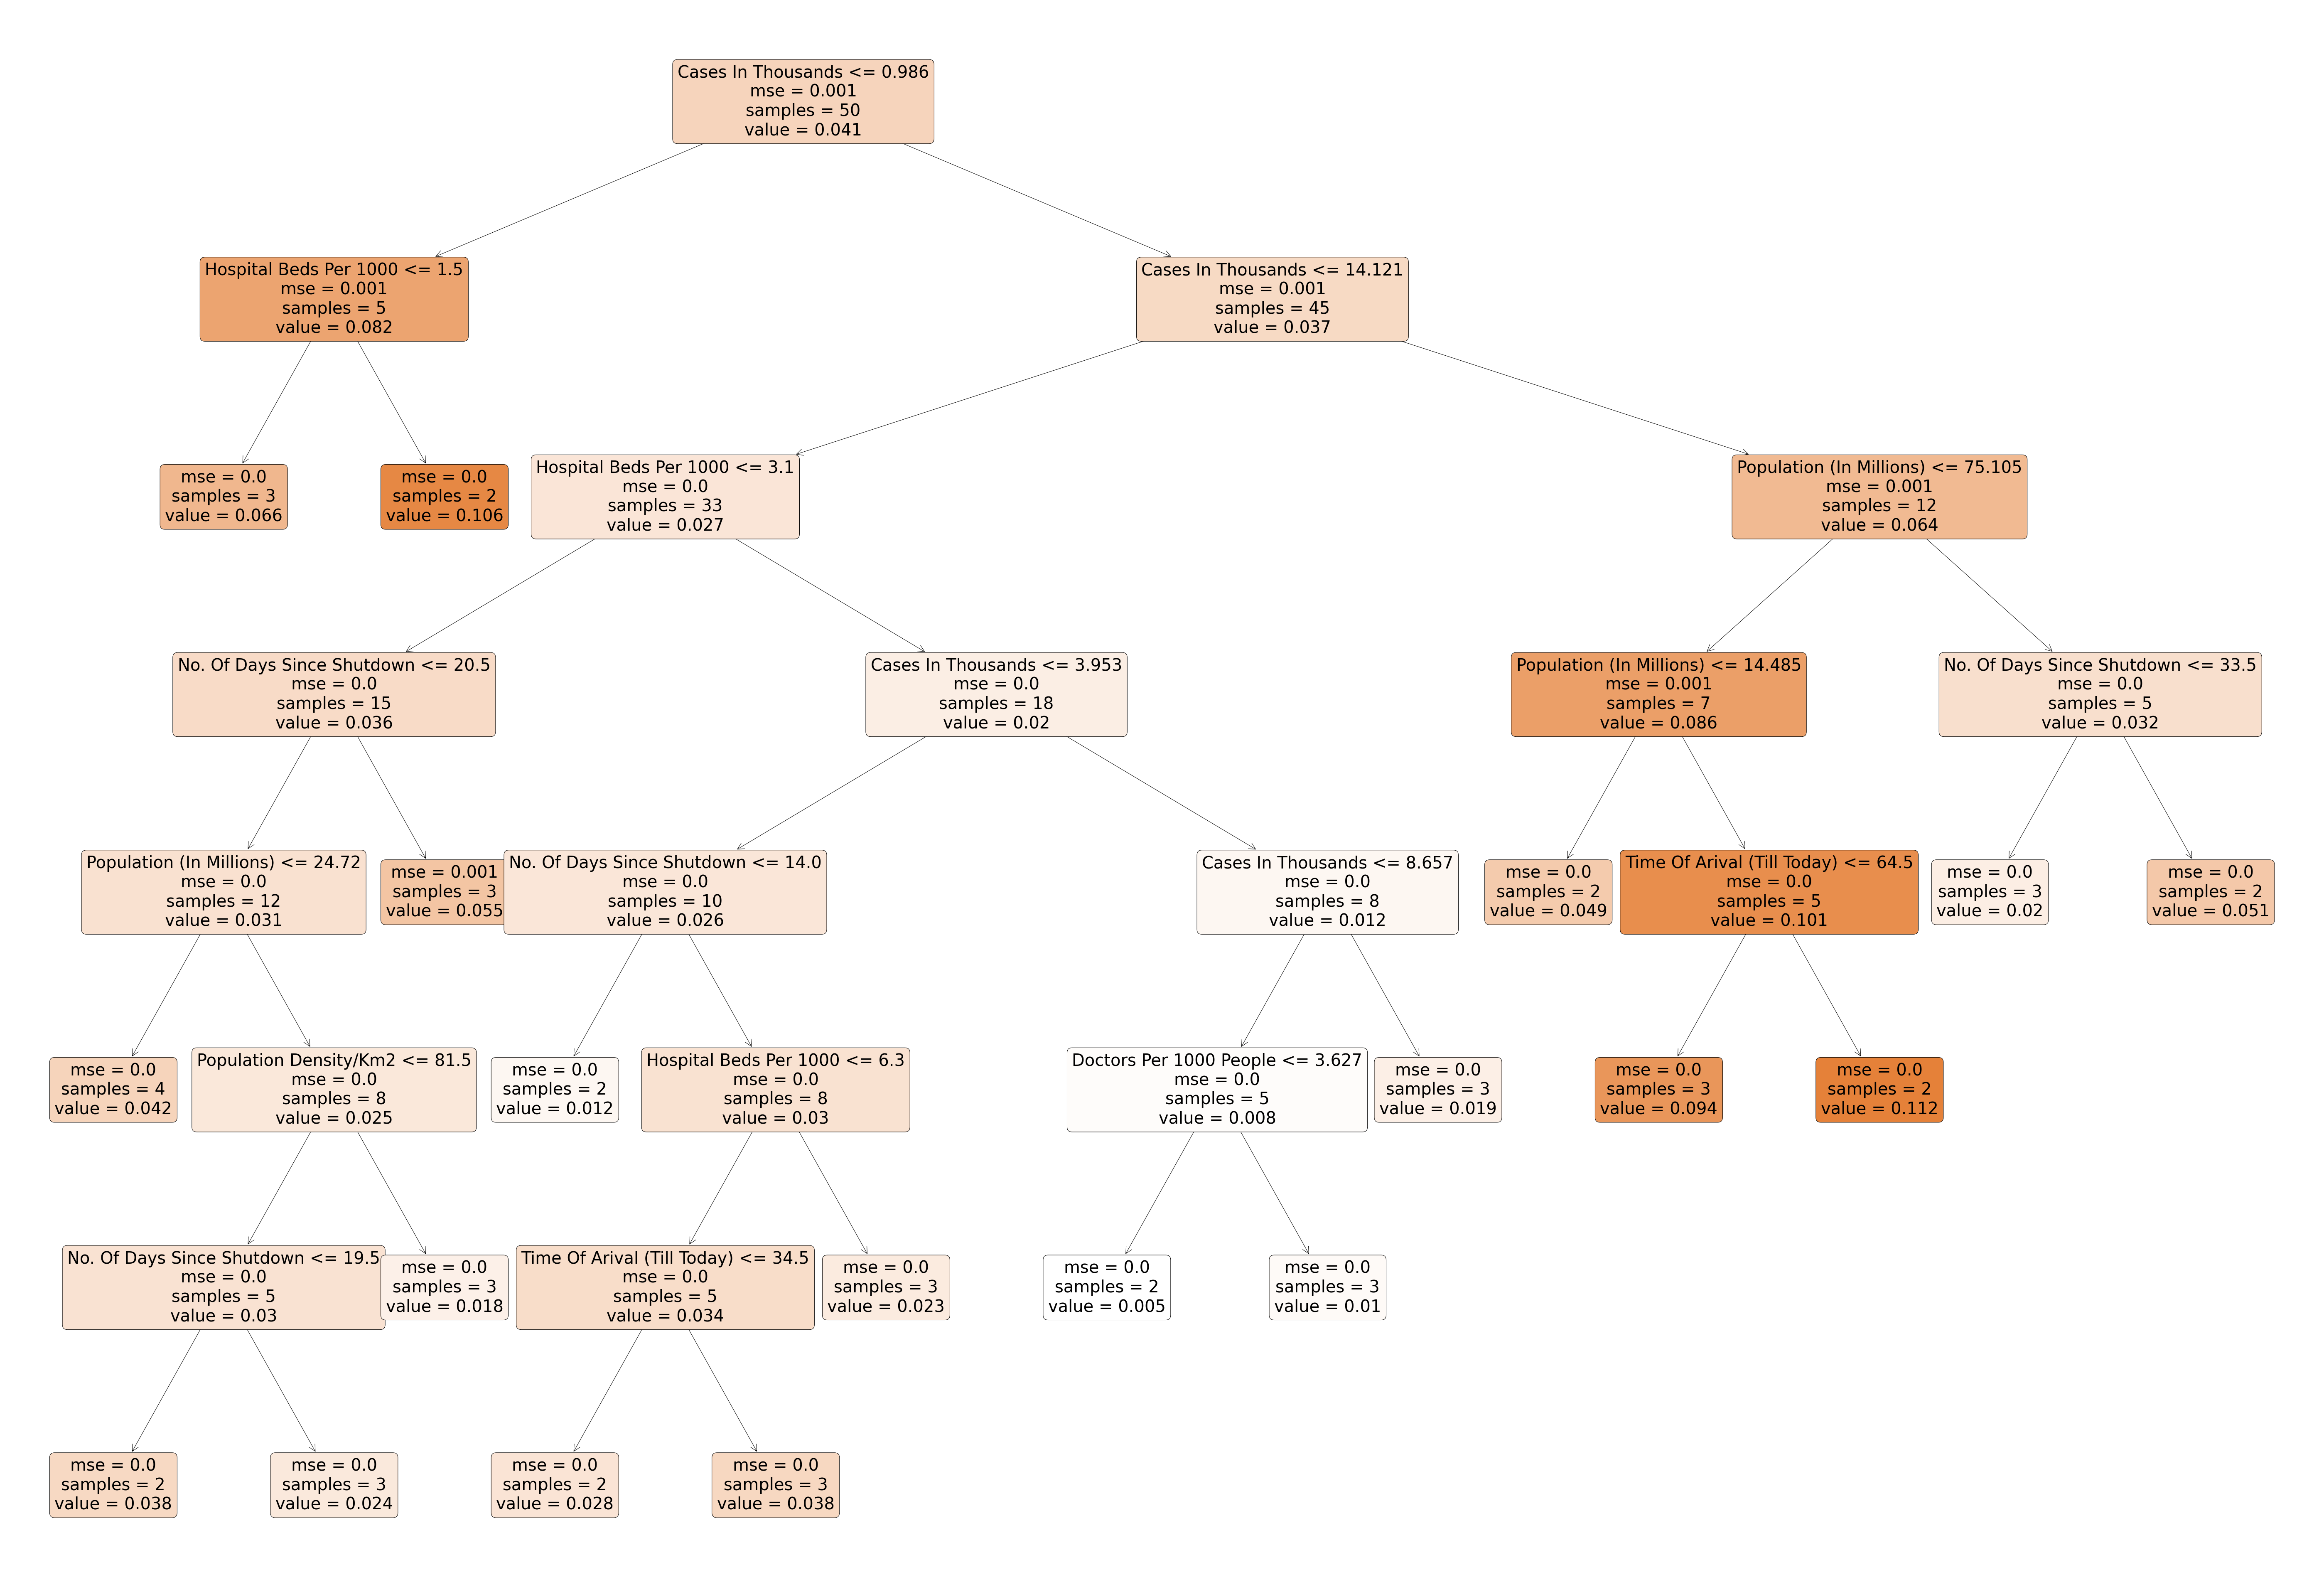

In [8]:
plt.figure(figsize=(100,70))
features = X.columns.str.title()
tree.plot_tree(model,fontsize=40, feature_names=features,
               filled=True, node_ids=False, rounded=True)
plt.show()

#### Different representation of regression tree

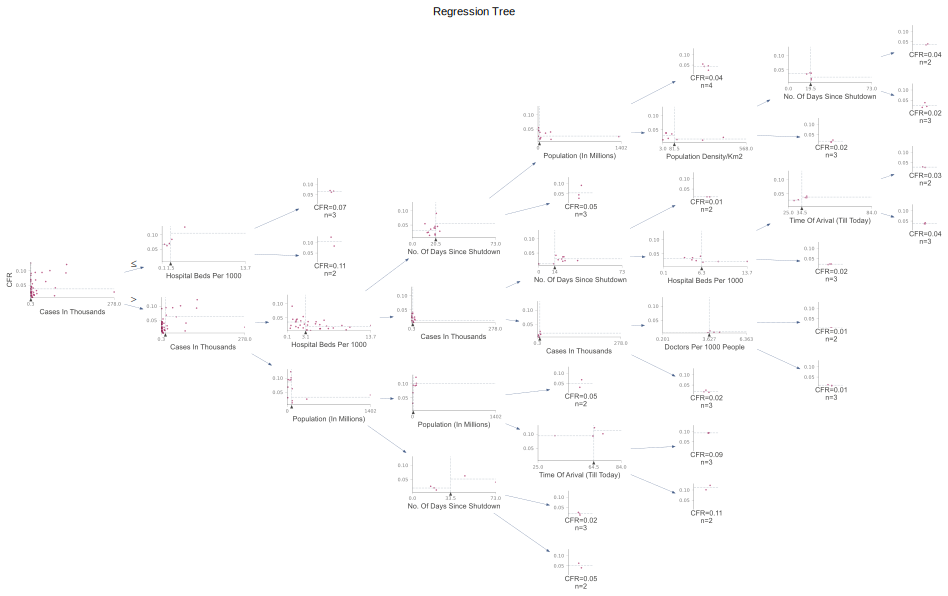

In [9]:
# In case I was interested in the prediction of a single observation:
# observed = np.array(covid_data)[np.random.randint(0, len(covid_data)),:]
from dtreeviz.trees import dtreeviz
viz = dtreeviz(model, X, y,
               target_name="CFR",
               feature_names= features,
               title='Regression Tree',
               scale=0.8, orientation="LR",
               show_node_labels = False,
               #X=observed
               colors={'title':'black',
                       'text':'#14213d',
                       'arrow':'#455e89',
                       'scatter_marker':'#a01a58',
                       'tick_label':'grey',
                       'split_line':'#CED4DA'})
viz

#### Variable Importance Plot

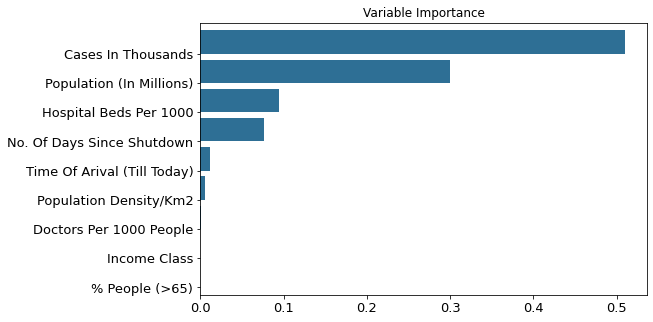

In [10]:
(pd.Series(model.feature_importances_,
           index= X.columns.str.title())
   .nsmallest(10) #To plot the 5 most important variables
   .plot(kind='barh',
         title = 'Variable Importance',
         figsize = [8,5],
         table = False,
         fontsize = 13,
         color = '#2e6f95',
         align='edge', width=0.8
         ));

### RT Europa

In [44]:
world = pd.read_csv("https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv")
world.replace('US', 'USA', inplace=True)
world.replace('United Kingdom', 'UK', inplace=True)
world.replace('CZ', 'Czechia', inplace=True)
world.replace('Russian Federation', 'Russia', inplace=True)
world.replace('Korea, South', 'S. Korea', inplace=True)

final = pd.merge(covid_data, world, 'left', on='Country')

final1 = final.groupby('Continent')
Africa = final1.get_group('Africa') #3 observations
Asia = final1.get_group('Asia') #13 observations
Europe = final1.get_group('Europe') #23 observation
N_America = final1.get_group('North America') #5 observation
S_America = final1.get_group('South America') #5 observation
Oceania = final1.get_group('Oceania') #1 observation

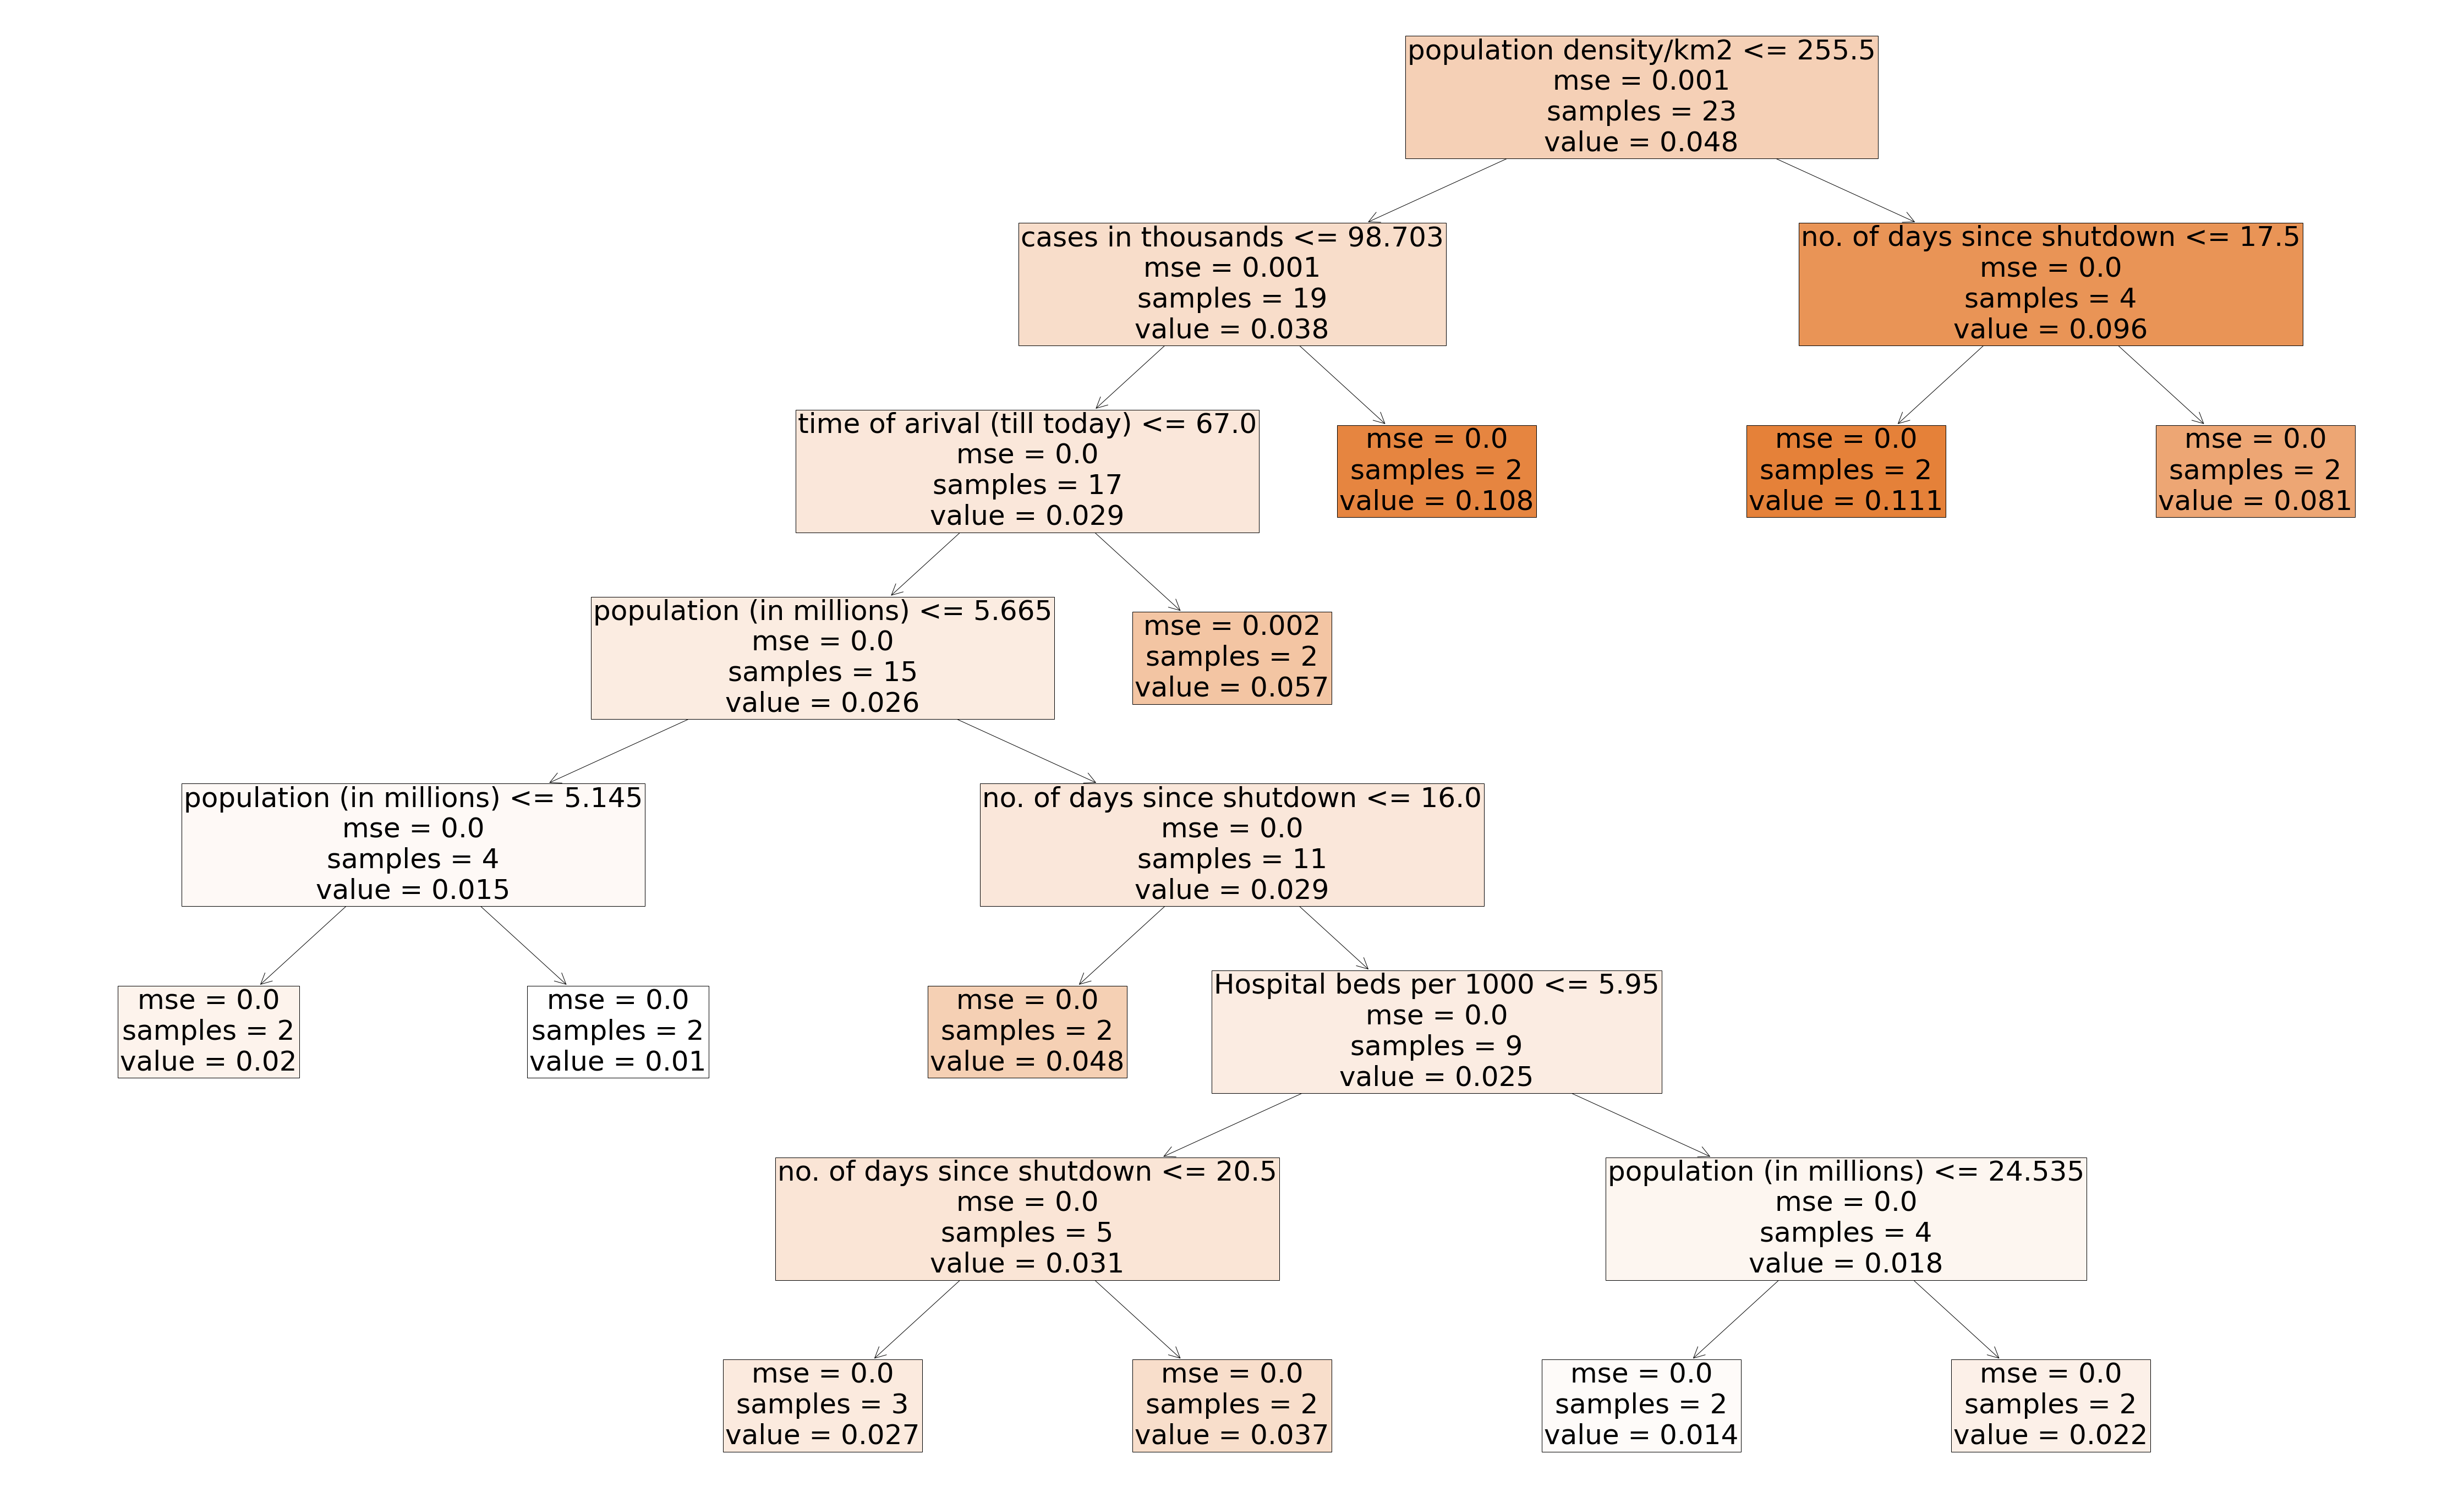

In [47]:
X3 = Europe.drop(columns=['CFR', 'Continent', 'Country', 'Total deaths', 'Climate zones'])
y3 = Europe['CFR']

#min split 10%, so in this case =2
model3 = tree.DecisionTreeRegressor(criterion= "mse", min_samples_split = 2, max_depth=15, min_samples_leaf=2)
model3.fit(X3,y3)
plt.figure(figsize=(80,50))
features = X3.columns
tree.plot_tree(model3, feature_names=features,filled=True, fontsize=50)
plt.show()

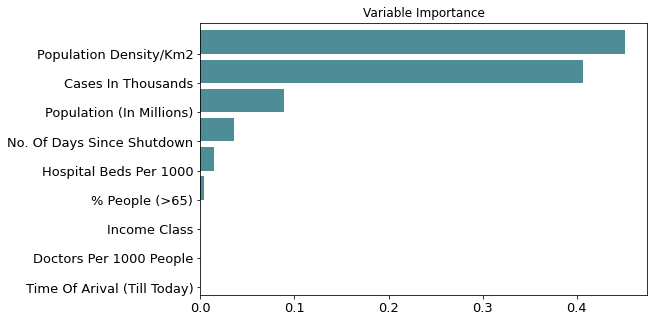

In [46]:
(pd.Series(model3.feature_importances_,
           index= X3.columns.str.title())
   .nsmallest(10) #To plot the 5 most important variables
   .plot(kind='barh',
         title = 'Variable Importance',
         figsize = [8,5],
         table = False,
         fontsize = 13,
         color = '#4E8d95',
         align='edge', width=0.8));

## Metrics

When assessing how well a model fits a dataset, we use the *Root Mean Squared Error* (**RMSE**). The RMSE is a metric computed as the square root of the average squared difference between the predicted values and the actual values in a dataset: 

$$RMSE=\sqrt{\sum{(\hat{y_i}-y_i)^2}\over{n}}$$

where:

  - $\hat{y}$ is the predicted value for the $ith$ observation
  - $y_i$ is the observed value for the $ith$ observation
  - $n$ is the sample size
  
The *Mean Absolute Error* (**MAE**) is a measure of errors between paired observations expressing the same phenomenon

$$MAE = {\sum{|\hat{y_i}-y_i|}\over{n}}$$

$MAE$ is conceptually simpler and also easier to interpret than $RMSE$: it is simply the average absolute vertical or horizontal distance between each point in a scatter plot as it is the average absolute difference between $\hat{y_i}$ and $y_i$. 

Furthermore, each error contributes to $MAE$ in proportion to the absolute value of the error. This is in contrast to $RMSE$, which involves squaring the differences, so that a few large differences will increase the $RMSE$ to a greater degree than the $MAE$

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

RMSE = 0.013
MAE = float('nan')
r2 = 0.896
Adj_r2 = 0.769

y_pred = model.predict(X)

RMSE2 = np.round(mean_squared_error(y, y_pred, squared=False), 4) 
MAE2 = np.round(mean_absolute_error(y, y_pred),4)
r2_2 = np.round(r2_score(y, y_pred),2)
Adj_r2_2 = np.round(1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1),2)

y_pred3 = model3.predict(X3)

RMSE3 = mean_squared_error(y3, y_pred3, squared=False)
MAE3 = mean_absolute_error(y3, y_pred3)
r2_3 = r2_score(y3, y_pred3)
Adj_r2_3 = 1 - (1-r2_score(y3, y_pred3)) * (len(y3)-1)/(len(y3)-X3.shape[1]-1)

(pd.DataFrame({'RMSE':[RMSE, RMSE2, RMSE3], 'MAE' :[MAE, MAE2, MAE3],
               'R^2': [r2, r2_2, r2_3], 'Adjusted R^2': [Adj_r2, Adj_r2_2, Adj_r2_3]}, 
              index = ['Paper Model Metrics', 'Our Model Metrics', 'EU Model Metrics'])
 .style.set_caption("Models Metrics")
 .set_table_styles([{'selector': 'caption', 'props': 'caption-side: top; font-size:1.3em;'}])
 .format(formatter={('RMSE'): lambda x: "{:,.3f}".format(x), ('MAE'): lambda x: "{:,.3f}".format(x),
                    ('R^2'): lambda x: '{:,.3f}'.format(x), ('Adjusted R^2'): lambda x: '{:,.3f}'.format(x)}))

,RMSE,MAE,R^2,Adjusted R^2
Paper Model Metrics,0.013,nan,0.896,0.769
Our Model Metrics,0.010,0.007,0.890,0.870
EU Model Metrics,0.015,0.010,0.832,0.715


We get different results for the same algorithm on the same machine implemented by different languages, such as R and Python. 


We think that these small differences in the implementation of the underlying math libraries used will cause differences in the resulting model and predictions made by that model.

Infact the **RMSE** reported in the *paper* corresponds to $0.013$. Whereas the RMSE computed by ourselves using `R` was $0.012$ and using `Python` was $0.010$ as shown in the chunk before.

This tells us that the average deviation between the predicted points scored and the actual points scored is 0.01.